In [2]:
from util import *
import matplotlib.pyplot as plt

In [3]:
m = 3
s = 5

# 1. Random Data Generator

In [4]:
for i in range(10):
    res = gaussian_data_generator(m, s)
    print(res)

6.285270639628343
6.146367426537438
2.3273454272245377
-0.07790665590076795
5.817335169010237
3.969524980863872
2.591280662036458
-0.29551945168087945
7.062601155541677
4.95611122634662


# 2. Sequential Estimator

In [5]:
m_estimate = 0
s_estimate = 0
sum = 0
sumsq = 0
n = 0
print('Data point source function: N({},{})'.format(m,s))
while abs(m_estimate - m) > 0.1 or abs(s_estimate - s) > 0.1:
    point = gaussian_data_generator(m, s)
    n += 1
    sum += point
    sumsq += point**2
    m_estimate = sum / n
    if n > 1:
        s_estimate = (sumsq - sum**2 / n) / (n-1)
    print('Add data point: {}'.format(point))
    print('Mean={}  Variance={}'.format(m_estimate,s_estimate))
    print()


Data point source function: N(3,5)
Add data point: 3.042186132695398
Mean=3.042186132695398  Variance=0

Add data point: 5.373499340998997
Mean=4.207842736847198  Variance=2.7175106376054003

Add data point: -0.43342378077719257
Mean=2.6607538976390677  Variance=8.539206948009781

Add data point: 3.5469089206714557
Mean=2.8822926533971645  Variance=5.889122313217906

Add data point: -1.579405943042973
Mean=1.9899529341091369  Variance=8.398192608008607

Add data point: 3.6763729522255417
Mean=2.2710229371285378  Variance=7.1925561659908395

Add data point: 7.718430892962018
Mean=3.0492240736761778  Variance=10.232975867460638

Add data point: 2.7471940235412786
Mean=3.0114703174093154  Variance=8.78252494100718

Add data point: 5.41950344787746
Mean=3.279029554127998  Variance=8.329000829762638

Add data point: -0.16494544969355163
Mean=2.934632053745843  Variance=8.58965267581711

Add data point: 5.845015420182547
Mean=3.1992123597855437  Variance=8.500717530020072

Add data point: 0.

# 3. Baysian Linear regression

In [16]:
b=1 #prior gaussian distribution's variance
n=3 #basis
a=3 #variance of N(0,a)
w=np.asarray([1, 2, 3]) #line parameters

In [17]:
NUM=1000
point_x=[]
point_y=[]

# after 10 points, after 50 points, final result
mean_list=[]
variance_list=[]

In [18]:
mean = np.zeros((n, 1))
variance = (1/b) * np.identity(n)
count = 0
eps = 1
while count <= NUM:
    point = polynomial_basis_generator(n, a, w)
    new_x = point[0]
    new_y = point[1]
    #point_x.append(new_x)
    #point_y.append(new_y)
    print('Add data point {}:'.format(point))
    print()
    X = np.asarray([math.pow(new_x,i) for i in range(n)])
    S = np.linalg.pinv(variance)
    X = X.reshape(1, -1)
    predicted_mean = mean.T.dot(X.T).item()
    
    predicted_variance = ((a) + X@variance@X.T).item()
    variance_new = np.linalg.pinv((1/a) * X.T@X + S)
    #print(variance_new.shape)
    #print((a * X.T * new_y + S@mean).shape)
    mean_new = variance_new@((1/a) * X.T * new_y + S@mean)
    
    print('Posterior mean:')
    print(mean_new)
    print()
    print('Posterior variance:')
    print(variance_new)
    print()

    print('Predictive distribution ~ N({:.5f},{:.5f})'.format(predicted_mean, predicted_variance))
    print('--------------------------------------------------')

    point_x.append(new_x)
    point_y.append(new_y)
    if count==10 or count==50 or count==NUM:
        mean_list.append(mean_new)
        variance_list.append(variance_new)

    mean=mean_new
    variance = variance_new
    count += 1


    

Add data point (-0.298281316053733, 1.4449221006993138):

Posterior mean:
[[ 0.35268775]
 [-0.10520017]
 [ 0.03137924]]

Posterior variance:
[[ 0.75591228  0.07280681 -0.02171691]
 [ 0.07280681  0.97828309  0.00647775]
 [-0.02171691  0.00647775  0.99806781]]

Predictive distribution ~ N(0.00000,4.09689)
--------------------------------------------------
Add data point (-0.5392676764569073, -0.27377706129567647):

Posterior mean:
[[ 0.23070728]
 [-0.02743287]
 [-0.0141337 ]]

Posterior variance:
[[ 0.63075805  0.1525975  -0.06841403]
 [ 0.1525975   0.92741342  0.03624898]
 [-0.06841403  0.03624898  0.98064434]]

Predictive distribution ~ N(0.41854,4.03163)
--------------------------------------------------
Add data point (-0.45905126512124905, 1.1706367056813116):

Posterior mean:
[[ 0.3682957 ]
 [-0.09429998]
 [ 0.01649114]]

Posterior variance:
[[ 0.54996459  0.19186262 -0.08639728]
 [ 0.19186262  0.90833082  0.04498873]
 [-0.08639728  0.04498873  0.97664157]]

Predictive distribution

In [19]:
def plot(num_points,x,mean,variance,title):
    mean_predict=np.zeros(500)
    variance_predict=np.zeros(500)
    for i in range(len(x)):
        X=np.asarray([math.pow(x[i],k) for k in range(n)]).reshape(1, -1)
        mean_predict[i]=(mean.T@X.T).item()
        variance_predict[i] = ((a) + X@variance@X.T).item()
        
    plt.plot(point_x[:num_points],point_y[:num_points],'bo')
    plt.plot(x,mean_predict,'k-')
    plt.plot(x,mean_predict+variance_predict,'r-')
    plt.plot(x,mean_predict-variance_predict,'r-')
    plt.xlim(-2,2)
    plt.ylim(-15,25)
    plt.title(title)
    plt.show()

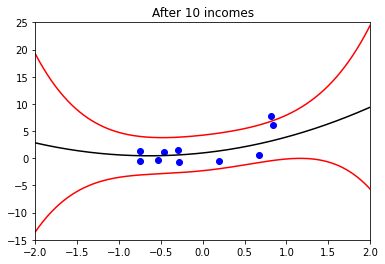

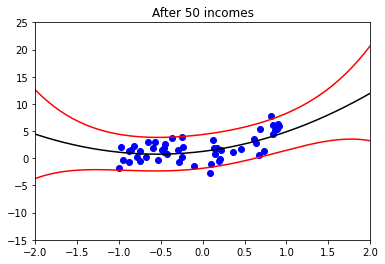

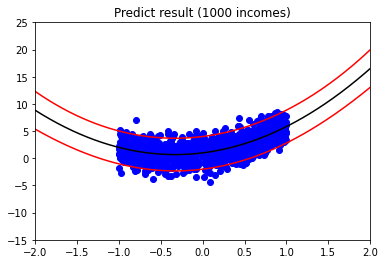

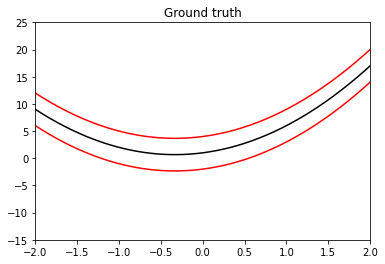

In [20]:
x=np.linspace(-2,2,500)
plot(10,x,mean_list[0],variance_list[0],'After 10 incomes')
plot(50,x,mean_list[1],variance_list[1],'After 50 incomes')
plot(NUM,x,mean_list[2],variance_list[2],'Predict result (1000 incomes)')
plot(0,x,w,np.zeros((n,n)),'Ground truth')